#  Customer Segmentation using KMeans Clustering

##  Project Overview
This project aims to perform customer segmentation using KMeans Clustering on the **Mall Customers** dataset. By identifying distinct customer groups based on **Age**, **Annual Income**, and **Spending Score**, we can help businesses design targeted marketing strategies and understand consumer behavior more effectively.

The pipeline includes:
- Exploratory Data Analysis (EDA)
- Data preprocessing (scaling, encoding)
- Optimal cluster selection using the Elbow Method
- Dimensionality reduction using PCA for visualization
- Segment profiling and marketing strategy recommendation

---------------------

Dataset Shape: (200, 5)

Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


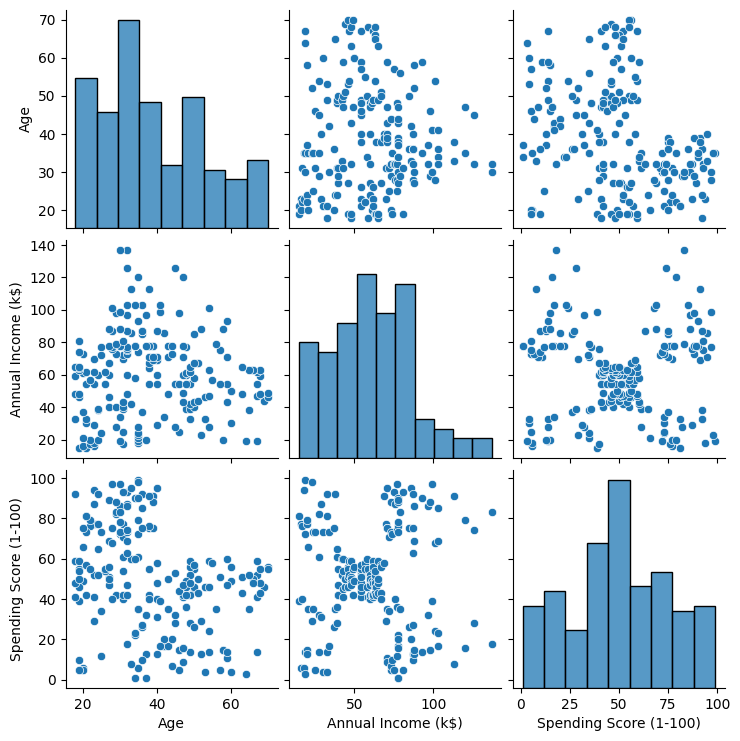

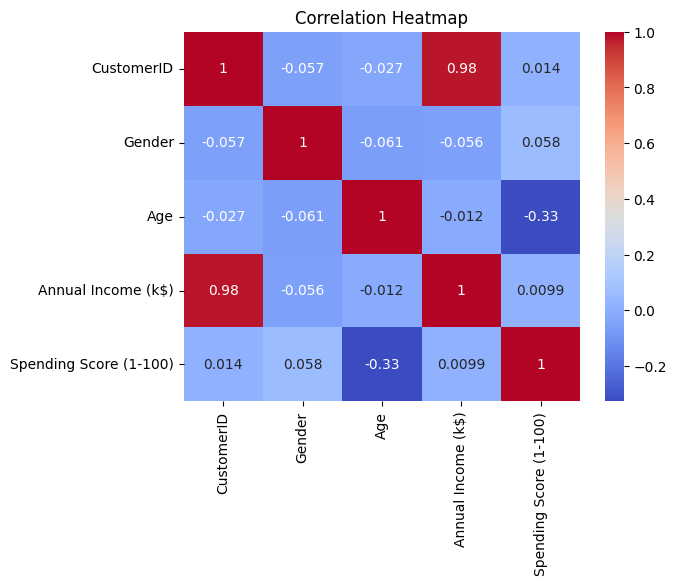

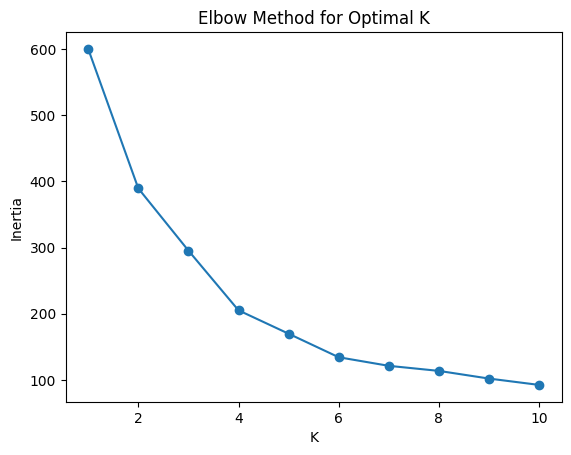

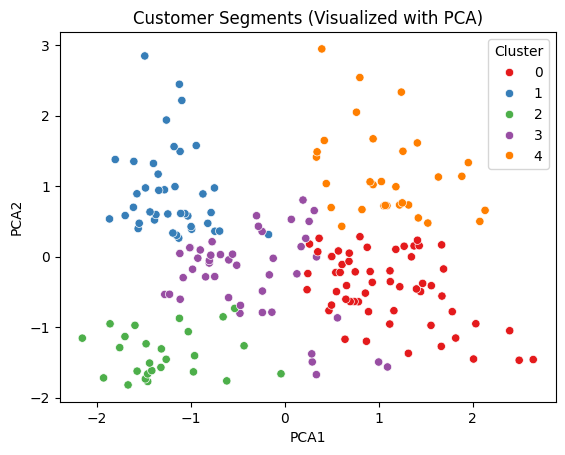


📊 Segment 0:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   58.000000  58.000000  58.000000           58.000000   
mean    68.775862   0.568966  55.275862           47.620690   
std     31.021805   0.499546   8.571256           13.413567   
min      9.000000   0.000000  40.000000           19.000000   
25%     45.500000   0.000000  49.000000           39.250000   
50%     69.500000   1.000000  53.000000           48.500000   
75%     92.500000   1.000000  63.750000           59.750000   
max    120.000000   1.000000  70.000000           67.000000   

       Spending Score (1-100)  Cluster       PCA1       PCA2  
count               58.000000     58.0  58.000000  58.000000  
mean                41.706897      0.0   1.089268  -0.445323  
std                 15.697814      0.0   0.580068   0.496509  
min                  3.000000      0.0   0.238889  -1.470489  
25%                 37.250000      0.0   0.644844  -0.767286  
50%                 46.000000      0.0  

In [2]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import streamlit as st  # Optional for simple dashboard (can skip if only using notebook)

#  Step 2: Load Dataset
df = pd.read_csv("Mall_Customers.csv")  # Make sure the CSV is in the same folder

#  Step 3: Basic Exploration
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.head()

#  Step 4: Rename Columns (if needed)
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#  Step 5: Convert Gender to Numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

#  Step 6: EDA - Visuals
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#  Step 7: Clustering (KMeans)
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#  Step 8: Final KMeans with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#  Step 9: PCA for Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("Customer Segments (Visualized with PCA)")
plt.show()

#  Step 10: Segment-wise Analysis
for i in range(5):
    print(f"\n📊 Segment {i}:")
    print(df[df['Cluster'] == i].describe())

#  Step 11: Marketing Strategy (Conclusion)
strategies = {
    0: "Target high-income customers with luxury promotions",
    1: "Loyal spenders — offer reward-based loyalty programs",
    2: "Young low spenders — promote entry-level products",
    3: "Mid-income customers — use seasonal discount strategies",
    4: "Elder segment — use personalized communication"
}
print("\n Recommended Marketing Strategies per Segment:")
for k, v in strategies.items():
    print(f"Segment {k}: {v}")

#  BONUS: Streamlit Version (Run via `streamlit run app.py`)
# if st.button("Show Segment Summary"):
#     st.write(df.groupby("Cluster").mean())


------------
##  Conclusion & Future Improvements

Using KMeans clustering and PCA visualization, we successfully segmented mall customers into 5 meaningful groups based on their age, annual income, and spending habits.

These customer segments allow businesses to tailor marketing strategies that are more personalized and effective — leading to improved engagement and higher profitability.

###  Future Improvements

- **Interactive Dashboard:** Implement a fully functional Streamlit app to allow dynamic filtering, summary views, and visual exploration of clusters.
-  **More Features:** Incorporate more attributes (e.g., product preference, frequency of visits) to enrich clustering.
-  **Advanced Models:** Experiment with Hierarchical Clustering or DBSCAN for deeper insights.
-  **Real-Time Data Integration:** Extend the model to work with live customer data for real-time segmentation.
